<a href="https://colab.research.google.com/github/Nico-GP/Star_Classification/blob/main/Star_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Proyecto 2
## Creado por: Nicolas Gonzalez
### Descripcion: Clasificacion de Cuerpos Celestes
* Creado: 20/02/22
* Ultima Actualizacion: 20/02/22

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/CodingDojo/Project2/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Diccionario de Variables

**obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

**alpha** = Right Ascension angle (at J2000 epoch)

**delta** = Declination angle (at J2000 epoch)

**u** = Ultraviolet filter in the photometric system

**g** = Green filter in the photometric system

**r** = Red filter in the photometric system

**i** = Near Infrared filter in the photometric system

**z** = Infrared filter in the photometric system

**run_ID** = Run Number used to identify the specific scan

**rerun_ID** = Rerun Number to specify how the image was processed

**cam_col** = Camera column to identify the scanline within the run

**field_ID** = Field number to identify each field

**spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

**class** = object class (galaxy, star or quasar object)

**redshift** = redshift value based on the increase in wavelength

**plate** = plate ID, identifies each plate in SDSS

**MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

**fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# Exploracion de Datos

Tamaño de la base de datos

In [50]:
df.shape

(100000, 18)

Informacion sobre la base de datos

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Valores faltantantes

In [52]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

> No hay valores faltantes

Informacion estadistica

In [53]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [54]:
pip install mplcyberpunk

In [55]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

In [56]:
import seaborn as sns

Distribucion de la variables

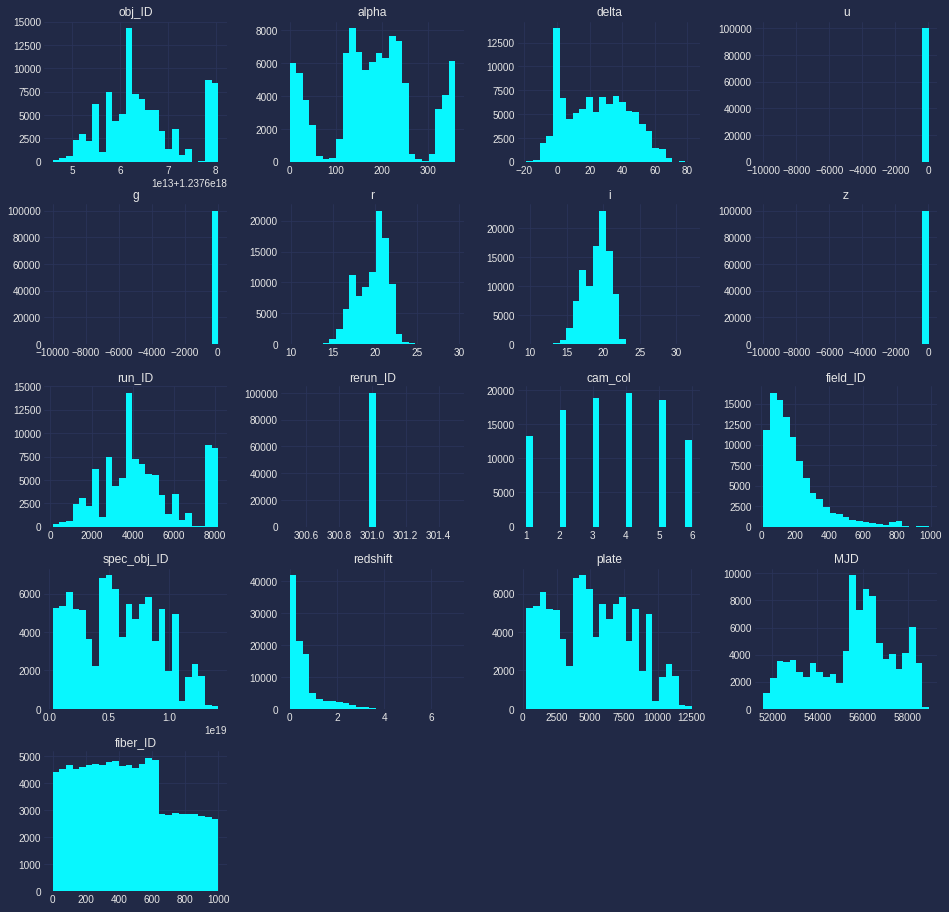

In [57]:
df.loc[:,:].hist(bins = 25,
                 figsize = (16,16),
                 xlabelsize = '10',
                 ylabelsize = '10',
                 );

Correlacion entre variables

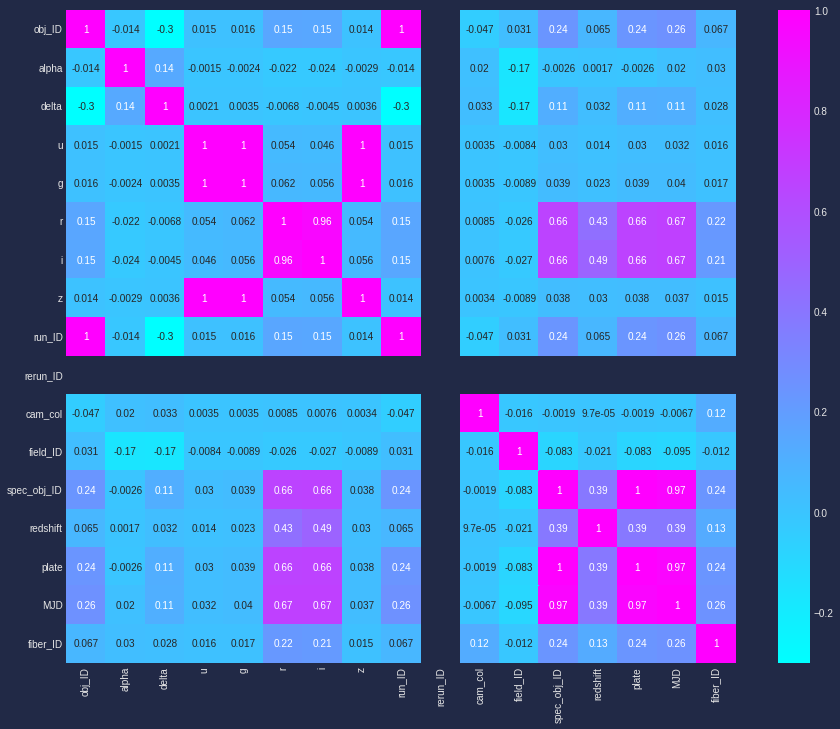

In [58]:
plt.figure(figsize = (15, 12));
sns.heatmap(df.corr(), cmap = 'cool', annot=True);

Correlacion entre variables fotometricas

In [59]:
df_ph = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]

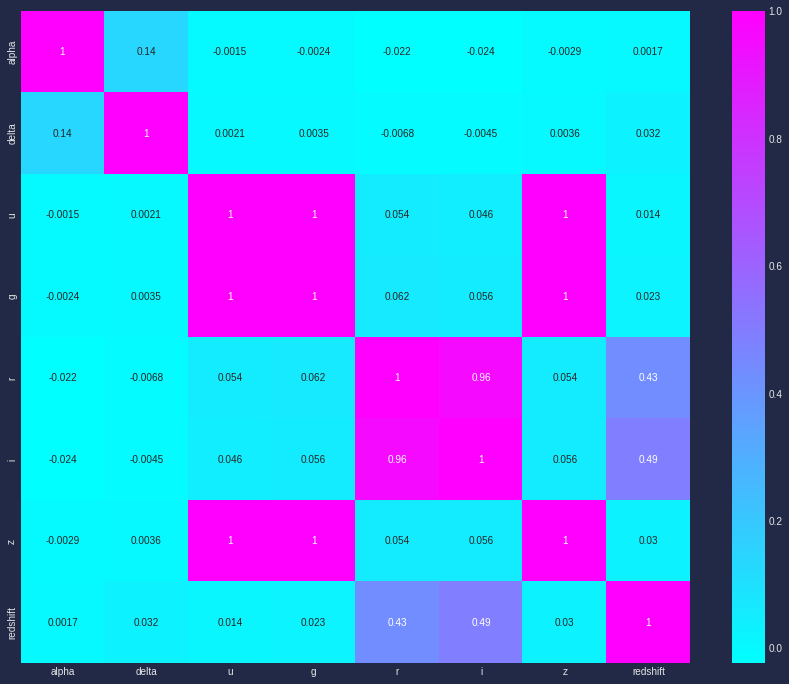

In [60]:
plt.figure(figsize = (15, 12));
sns.heatmap(df_ph.corr(), cmap = 'cool', annot = True);

Correlacion entre variables de instrumentos de medicion

In [61]:
df_id = df[['run_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'fiber_ID']]

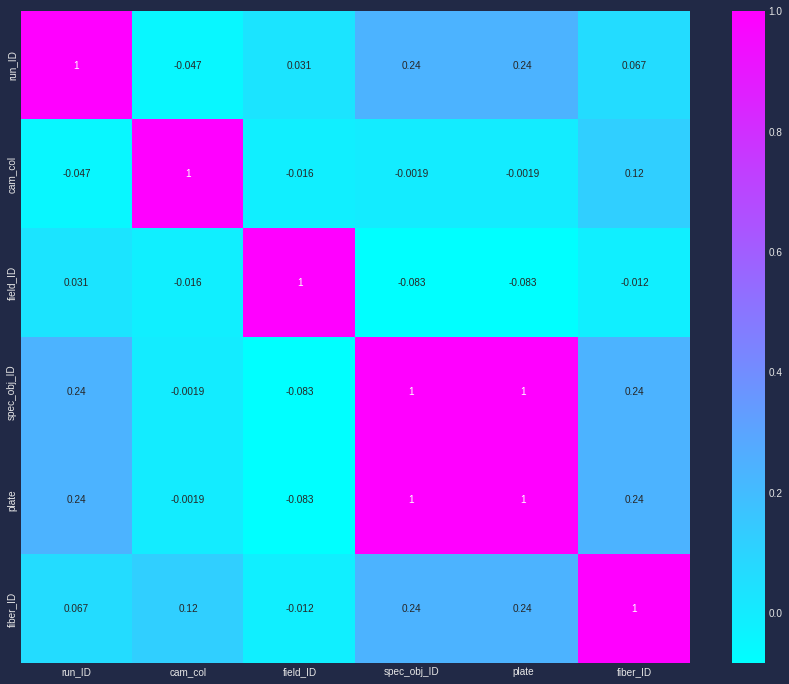

In [62]:
plt.figure(figsize = (15, 12));
sns.heatmap(df_id.corr(), cmap = 'cool', annot = True);

Distribucion de tipo de cuerpos celestes

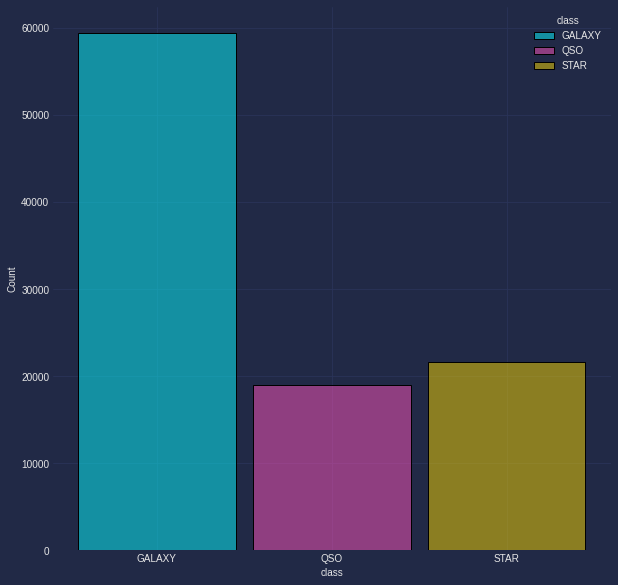

In [63]:
plt.figure(figsize = (10, 10));
sns.histplot(x = 'class', data = df, shrink = 0.9, hue = 'class'); 

Distribucion de fechas de medicion

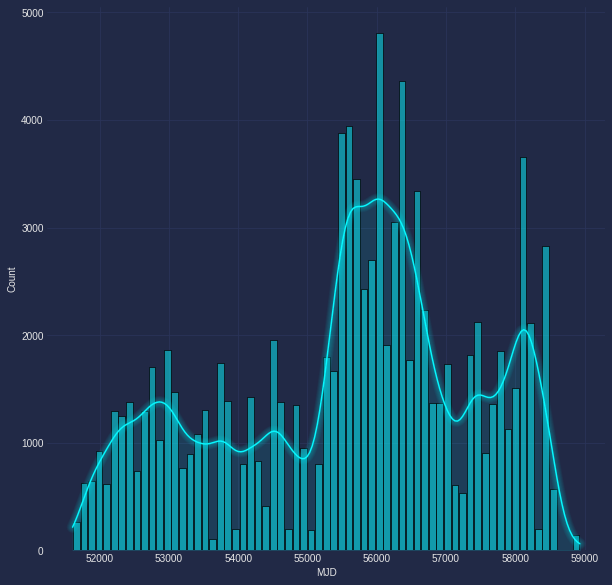

In [64]:
plt.figure(figsize = (10, 10));
sns.histplot(x='MJD', data=df, shrink=0.9, kde = True);
mplcyberpunk.add_glow_effects()

Relacion entre angulo de ascension recta y angulo de declinación

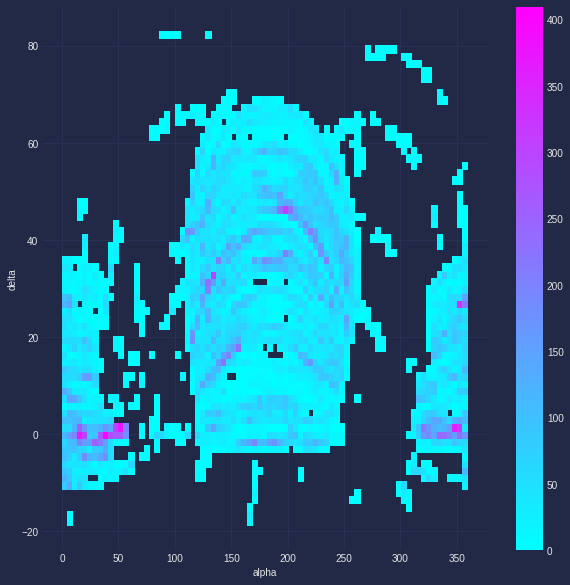

In [65]:
plt.figure(figsize = (10, 10));
sns.histplot(x = 'alpha', y = 'delta', data = df,
             cbar = True, cmap = 'cool'
            );

Distribucion de cuerpos celestes segun aumento de longitud de onda

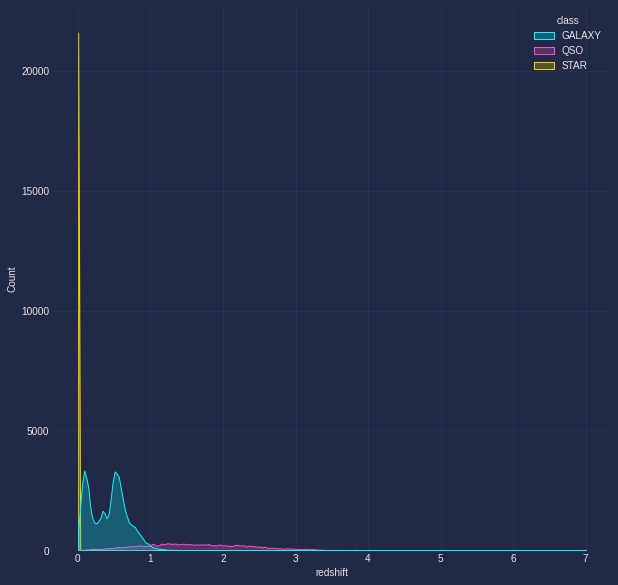

In [66]:
plt.figure(figsize = (10, 10));
sns.histplot(x = 'redshift', data = df, 
             hue = 'class',
             element = 'poly'
            );
mplcyberpunk.add_glow_effects()

Dispresion de cuerpos celestes segun filtro ultravioleta e infrarrojo en el sistema fotométrico

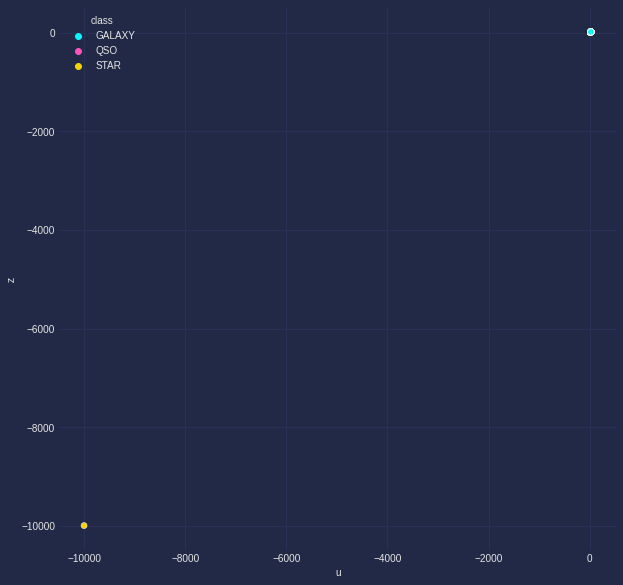

In [67]:
plt.figure(figsize = (10, 10));
sns.scatterplot(x = 'u', y = 'z', hue = 'class',
                data = df
               );
mplcyberpunk.make_scatter_glow()

Valor promedio de angulo de ascension recta por tipo de cuerpo celeste

In [68]:
df.groupby(['class'])[['alpha']].mean()

,alpha
class,
GALAXY,177.954727
QSO,180.474314
STAR,174.234485


Valor promedio de angulo de declinacion por tipo de cuerpo celeste

In [69]:
df.groupby(['class'])[['delta']].mean()

,delta
class,
GALAXY,23.513911
QSO,26.808621
STAR,23.498554


Valor promedio de filtro ultravioleta en el sistema fotométrico por tipo de cuerpo celeste

In [70]:
df.groupby(['class'])[['u']].mean()

,u
class,
GALAXY,22.587379
QSO,21.547619
STAR,20.689805


Valor promedio de filtro verde en el sistema fotométrico por tipo de cuerpo celeste

In [71]:
df.groupby(['class'])[['g']].mean()

,g
class,
GALAXY,20.906101
QSO,20.926193
STAR,19.153188


Valor promedio de filtro rojo en el sistema fotométrico por tipo de cuerpo celeste

In [72]:
df.groupby(['class'])[['r']].mean()

,r
class,
GALAXY,19.587552
QSO,20.624089
STAR,18.946969


Valor promedio de filtro cercano infrarrojo en el sistema fotométrico por tipo de cuerpo celeste

In [73]:
df.groupby(['class'])[['i']].mean()

,i
class,
GALAXY,18.851990
QSO,20.431173
STAR,18.543736


Valor promedio de filtro infrarrojo en el sistema fotométrico por tipo de cuerpo celeste

In [74]:
df.groupby(['class'])[['z']].mean()

,z
class,
GALAXY,18.449156
QSO,20.266732
STAR,17.870400


Valor promedio de valor de corrimiento al rojo basado en el aumento de la longitud de onda por tipo de cuerpo celeste

In [75]:
df.groupby(['class'])[['redshift']].mean()

,redshift
class,
GALAXY,0.421596
QSO,1.719676
STAR,-0.000115
